In [9]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
'''
@File    :   IEEE802-16d路径损耗模型.ipynb
@Time    :   2025/05/05 17:17:10
@Author  :   Neutrin 
'''

# here put the import lib
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib as mpl
# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

# 确保Jupyter Notebook中的图表能正确显示中文
mpl.rc('font', family='SimHei')
mpl.rcParams['axes.unicode_minus'] = False

In [10]:
# 测试IEEE 802.16d模型
fc = 2.0e9       # 载波频率2GHz
htx = 30         # 发射机高度30m
hrx1 = 2         # 接收机高度2m
hrx2 = 10        # 接收机高度10m
d = np.logspace(0, 3, 100)  # 1m到1000m

In [11]:
def PL_IEEE80216d(fc, d, type, htx, hrx, corr_fact='NO', mod='UNMOD'):
    """
    IEEE 802.16d 模型
    输入:
        fc        : 载波频率 [Hz]
        d         : 基站和移动台之间的距离 [m]
        type      : 可以选择'A', 'B' 或 'C'
        htx       : 发射机高度 [m]
        hrx       : 接收机高度 [m]
        corr_fact : 如果有影响, 此会设置为 'ATnT' 或 'Okumura'. 若则, 设置为'NO'
        mod       : 设置为'mod'来得到修正的 IEEE 802.16d 模型
    输出:
        PL        : 路径损耗 [dB]
    """
    # 参数处理
    Mod = 'UNMOD'
    
    # 确保处理字符串时不会出现subscriptable错误
    str_mod = str(mod)
    str_corr_fact = str(corr_fact)
    str_hrx = str(hrx)
    str_htx = str(htx)
    str_type = str(type)
    
    if len(str_mod) > 6:
        Mod = str_mod.upper()
    
    if len(str_mod) == 6 and str_corr_fact and str_corr_fact[0] == 'm':
        Mod = 'MOD'
        corr_fact = 'NO'
    
    elif len(str_mod) < 6:
        corr_fact = 'NO'
        
        if len(str_mod) == 5 and str_hrx and str_hrx[0] == 'm':
            Mod = 'MOD'
            hrx = 2
            
        elif len(str_mod) < 5:
            hrx = 2
            
            if len(str_mod) == 4 and str_htx and str_htx[0] == 'm':
                Mod = 'MOD'
                htx = 30
                
            elif len(str_mod) < 4:
                htx = 30
                
                if len(str_mod) == 3 and str_type and str_type[0] == 'm':
                    Mod = 'MOD'
                    type = 'A'
                    
                elif len(str_mod) < 3:
                    type = 'A'
    
    d0 = 100  # 参考距离
    Type = str(type).upper()
    
    # 检查类型是否支持
    if Type != 'A' and Type != 'B' and Type != 'C':
        print("Error: The selected type is not supported")
        return None
    
    # 基于校正因子计算路径损耗
    corr_fact = str(corr_fact).upper()
    if corr_fact == 'ATNT':
        PLf = 6 * np.log10(fc/2e9)        # 式(1.13)
        PLh = -10.8 * np.log10(hrx/2)     # 式(1.14)
        
    elif corr_fact == 'OKUMURA':
        PLf = 6 * np.log10(fc/2e9)        # 式(1.13)
        
        if hrx <= 3:
            C_Rx = -10 * np.log10(hrx/3)  # 式(1.15)
        else:
            C_Rx = -20 * np.log10(hrx/3)
            
        PLh = C_Rx
        
    else:  # 'NO'
        PLf = 0
        PLh = 0
    
    # 计算A,B,C类型的路径损耗
    if Type == 'A':  # 城区/郊区，NLOS
        a = 4.6
        b = 0.0075
        c = 12.6
        X_h = 10.8 * np.log10(hrx/2)
        if corr_fact == 'ATNT':
            X_h = 0
        
        gamma = a - b*htx + c/htx
        
        if isinstance(d, np.ndarray):
            PL = np.zeros_like(d, dtype=float)
            for i in range(len(d)):
                if d[i] > d0:
                    PL[i] = 20 * np.log10(4*np.pi*d0*fc/3e8) + 10*gamma*np.log10(d[i]/d0) + PLf + PLh - X_h
                else:
                    PL[i] = 20 * np.log10(4*np.pi*d[i]*fc/3e8)
        else:
            if d > d0:
                PL = 20 * np.log10(4*np.pi*d0*fc/3e8) + 10*gamma*np.log10(d/d0) + PLf + PLh - X_h
            else:
                PL = 20 * np.log10(4*np.pi*d*fc/3e8)
                
    elif Type == 'B':  # 城区，NLOS
        a = 4
        b = 0.0065
        c = 17.1
        X_h = 10.8 * np.log10(hrx/2)
        if corr_fact == 'ATNT':
            X_h = 0
        
        gamma = a - b*htx + c/htx
        
        if isinstance(d, np.ndarray):
            PL = np.zeros_like(d, dtype=float)
            for i in range(len(d)):
                if d[i] > d0:
                    PL[i] = 20 * np.log10(4*np.pi*d0*fc/3e8) + 10*gamma*np.log10(d[i]/d0) + PLf + PLh - X_h
                else:
                    PL[i] = 20 * np.log10(4*np.pi*d[i]*fc/3e8)
        else:
            if d > d0:
                PL = 20 * np.log10(4*np.pi*d0*fc/3e8) + 10*gamma*np.log10(d/d0) + PLf + PLh - X_h
            else:
                PL = 20 * np.log10(4*np.pi*d*fc/3e8)
                
    elif Type == 'C':  # 密集城区，NLOS
        a = 3.6
        b = 0.005
        c = 20
        X_h = 10.8 * np.log10(hrx/2)
        if corr_fact == 'ATNT':
            X_h = 0
        
        gamma = a - b*htx + c/htx
        
        if isinstance(d, np.ndarray):
            PL = np.zeros_like(d, dtype=float)
            for i in range(len(d)):
                if d[i] > d0:
                    PL[i] = 20 * np.log10(4*np.pi*d0*fc/3e8) + 10*gamma*np.log10(d[i]/d0) + PLf + PLh - X_h
                else:
                    PL[i] = 20 * np.log10(4*np.pi*d[i]*fc/3e8)
        else:
            if d > d0:
                PL = 20 * np.log10(4*np.pi*d0*fc/3e8) + 10*gamma*np.log10(d/d0) + PLf + PLh - X_h
            else:
                PL = 20 * np.log10(4*np.pi*d*fc/3e8)
                
    return PL

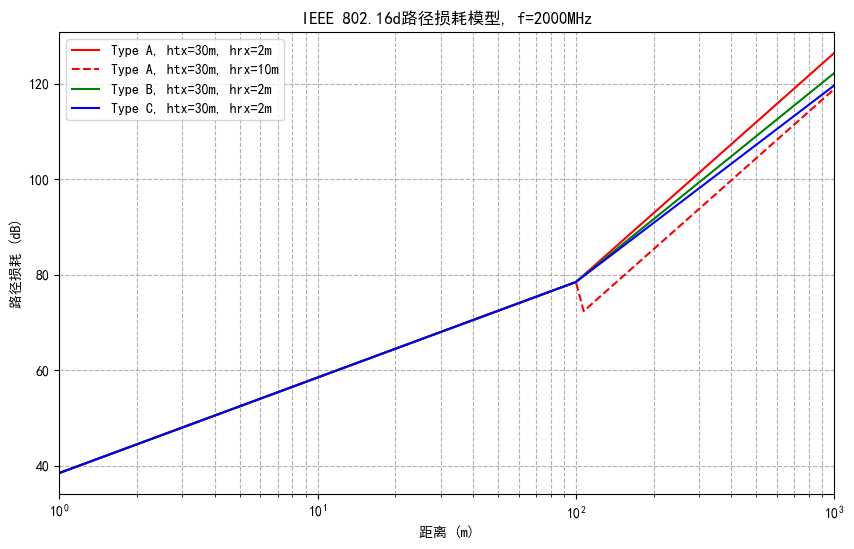

In [12]:
# 计算不同类型和不同接收机高度的路径损耗
PL_A_hrx1 = PL_IEEE80216d(fc, d, 'A', htx, hrx1)
PL_A_hrx2 = PL_IEEE80216d(fc, d, 'A', htx, hrx2)
PL_B_hrx1 = PL_IEEE80216d(fc, d, 'B', htx, hrx1)
PL_C_hrx1 = PL_IEEE80216d(fc, d, 'C', htx, hrx1)

# 绘图
plt.figure(figsize=(10, 6))
plt.semilogx(d, PL_A_hrx1, 'r-', label=f'Type A, htx={htx}m, hrx={hrx1}m')
plt.semilogx(d, PL_A_hrx2, 'r--', label=f'Type A, htx={htx}m, hrx={hrx2}m')
plt.semilogx(d, PL_B_hrx1, 'g-', label=f'Type B, htx={htx}m, hrx={hrx1}m')
plt.semilogx(d, PL_C_hrx1, 'b-', label=f'Type C, htx={htx}m, hrx={hrx1}m')

plt.xlabel('距离 (m)')
plt.ylabel('路径损耗 (dB)')
plt.title('IEEE 802.16d路径损耗模型, f=2000MHz')
plt.grid(True, which='both', linestyle='--')
plt.xlim(1, 1000)
plt.legend()
plt.show()